# 결과 요약
다중 회귀 결과 최종 모델은 '전날 만족도'와 '수면시간'이 독립변수인 회귀모델이다.

----------------------------------------------------------------------------

회귀식 : today_score = 0.7735 * yesterday_satisfaction + 0.0077 * sleep_time

독립변수 '전날 만족도'와 '수면시간'은 squirrel의 '오늘의 점수'를 약 27% 설명하며, 전날 만족도가 1점 높아지면 '오늘의 점수'가 0.7735점 높아지고, 수면 시간이 1분 증가하면 '오늘의 점수'는 0.0077점 높아진다.

In [1]:
import pandas as pd
import  numpy  as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import ols
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# matplotlib 한글 폰트 출력코드, 윈도우 / 맥 모두 동작합니다!
import matplotlib
from matplotlib import font_manager, rc
import platform
try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# 구글 코랩과 google drive를 mount(연결) 하는 코드

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# google drive 내부에 파일이 담긴 폴더 경로를 입력하세요
path = '/content/drive/MyDrive/colab/'

# 1. 데이터 불러오기

In [6]:
today = pd.read_excel(path + "today_score_data.xlsx")

In [7]:
today.head(3)

,cnt,name,today_score,date,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,...,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_range,getup_range,gotobed_late,getup_early
0,1,quokka,9,2022-09-28,4,0,20.4,16.1,26.1,0.0,...,70,11772,0,0,0,2,03시대,08시대,1,0
1,2,quokka,6,2022-09-29,5,0,20.4,16.4,26.5,0.0,...,0,5800,0,0,0,3,03시대,08시대,1,0
2,3,quokka,4,2022-09-30,6,0,20.7,14.8,27.7,0.0,...,0,2775,0,0,0,4,05시대,10시대,1,0


In [8]:
squirrel =  today[today['name']=='squirrel']

In [14]:
squirrel.head(3)

,cnt,name,today_score,date,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,...,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_range,getup_range,gotobed_late,getup_early
144,145,squirrel,6,2022-09-28,4,0,20.4,16.1,26.1,0.0,...,0,5567,0,0,1,4,02시대,08시대,1,0
145,146,squirrel,8,2022-09-29,5,0,20.4,16.4,26.5,0.0,...,0,7057,1,0,1,3,00시대,09시대,0,0
146,147,squirrel,7,2022-09-30,6,0,20.7,14.8,27.7,0.0,...,0,2441,1,0,1,4,00시대,08시대,0,0


## 데이터 확인

In [9]:
squirrel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 144 to 191
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      48 non-null     int64         
 1   name                     48 non-null     object        
 2   today_score              48 non-null     int64         
 3   date                     48 non-null     datetime64[ns]
 4   dayofweek                48 non-null     int64         
 5   dayofweek_check          48 non-null     int64         
 6   avg_temp                 48 non-null     float64       
 7   low_temp                 48 non-null     float64       
 8   high_temp                48 non-null     float64       
 9   precipitation            48 non-null     float64       
 10  precipitation_check      48 non-null     int64         
 11  class_check              48 non-null     int64         
 12  gotobed_time             48 non-nul

In [10]:
squirrel.describe()

,cnt,today_score,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,precipitation_check,class_check,...,sleep_score,yesterday_exercise,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_late,getup_early
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.0,48.0,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.000000
mean,168.50,6.604167,4.020833,0.291667,13.929167,9.595833,19.250000,3.792500,0.208333,0.750000,...,3.750000,0.0,0.0,6466.083333,0.333333,0.0,0.750000,3.625000,0.541667,0.229167
std,14.00,1.898931,2.036785,0.459340,3.762636,3.929591,4.017197,14.023592,0.410414,0.437595,...,1.193956,0.0,0.0,3572.866457,0.476393,0.0,0.437595,1.023656,0.503534,0.424744
min,145.00,2.000000,1.000000,0.000000,4.900000,0.800000,9.800000,0.000000,0.000000,0.000000,...,1.000000,0.0,0.0,118.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000
25%,156.75,5.000000,2.000000,0.000000,11.175000,6.650000,16.550000,0.000000,0.000000,0.750000,...,3.000000,0.0,0.0,4897.250000,0.000000,0.0,0.750000,3.000000,0.000000,0.000000
50%,168.50,7.000000,4.000000,0.000000,13.550000,9.550000,19.100000,0.000000,0.000000,1.000000,...,4.000000,0.0,0.0,5938.000000,0.000000,0.0,1.000000,4.000000,1.000000,0.000000
75%,180.25,8.000000,6.000000,1.000000,16.300000,11.800000,21.600000,0.000000,0.000000,1.000000,...,5.000000,0.0,0.0,8333.500000,1.000000,0.0,1.000000,4.000000,1.000000,0.000000
max,192.00,10.000000,7.000000,1.000000,21.400000,17.500000,27.700000,76.000000,1.000000,1.000000,...,5.000000,0.0,0.0,13930.000000,1.000000,0.0,1.000000,5.000000,1.000000,1.000000


# 2. 데이터 전처리

In [11]:
print(squirrel['yesterday_exercise'].value_counts())
print('-----------------------------------------------------')
print(squirrel['yesterday_exercise_time'].value_counts())
print('-----------------------------------------------------')
print(squirrel['period'].value_counts())

0    48
Name: yesterday_exercise, dtype: int64
-----------------------------------------------------
0    48
Name: yesterday_exercise_time, dtype: int64
-----------------------------------------------------
0    48
Name: period, dtype: int64


yesterday_exercise, yesterday_exercise_time, period 변수는 모든 값이 0이므로 제외

cnt 변수는 의미 없는 값이므로 제외

name 변수는 모든 값이 squirrel이므로 제외

In [31]:
# 사용하지 않을 column drop

squirrel = squirrel.drop(labels=['cnt', 'name', 'yesterday_exercise','yesterday_exercise_time', 'period'],axis=1)

In [19]:
# sleep_time 반올림

#squirrel['sleep_time'] = squirrel.round({'sleep_time':1})['sleep_time']

# 3. EDA

### 늦은 수면 시간대 변수 분포 확인

In [15]:
x = squirrel.gotobed_range.value_counts().sort_index().index
y = squirrel.gotobed_range.value_counts().sort_index().values

<BarContainer object of 6 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


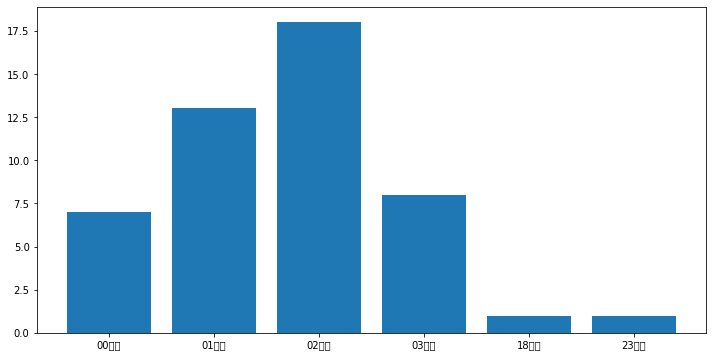

In [16]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
plt.figure(figsize=(12,6))
plt.bar(x,y)

In [17]:
squirrel.gotobed_range.value_counts()

02시대    18
01시대    13
03시대     8
00시대     7
18시대     1
23시대     1
Name: gotobed_range, dtype: int64

In [18]:
squirrel.gotobed_late.value_counts()

1    26
0    22
Name: gotobed_late, dtype: int64

수면 시간대별 분포 확인 결과, 2시대를 기준으로 늦은 수면 여부를 나누는 것이 적절하다고 판단

### 이른 기상 시간대 변수 분포 확인

In [19]:
x = squirrel.getup_range.value_counts().sort_index().index
y = squirrel.getup_range.value_counts().sort_index().values

<BarContainer object of 7 artists>

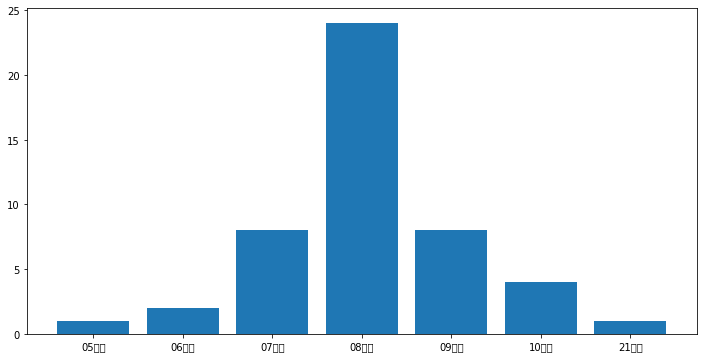

In [20]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
plt.figure(figsize=(12,6))
plt.bar(x,y)

In [21]:
squirrel.getup_range.value_counts()

08시대    24
09시대     8
07시대     8
10시대     4
06시대     2
21시대     1
05시대     1
Name: getup_range, dtype: int64

In [22]:
squirrel.getup_early.value_counts()

0    37
1    11
Name: getup_early, dtype: int64

기상 시간대별 분포 확인 결과, 7시대를 기준으로 이른 기상 여부를 나누는 것이 적절하다고 판단

## bar chart를 통한 칼럼별 값 개수 확인

In [34]:
# bar chart 그릴 column

col_eda_bar = list(set(squirrel.columns) - set(['gotobed_late','getup_early','sleep_time','date','avg_temp', 'low_temp', 'high_temp', 'precipitation', 'yesterday_step_cnt','gotobed_time','getup_time']))
col_eda_bar

['class_check',
 'yesterday_drinking',
 'morning_routine',
 'today_score',
 'gotobed_range',
 'weather_prefer',
 'dayofweek_check',
 'getup_range',
 'caffeine',
 'yesterday_satisfaction',
 'dayofweek',
 'sleep_score',
 'precipitation_check']

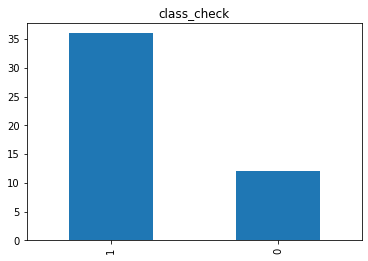

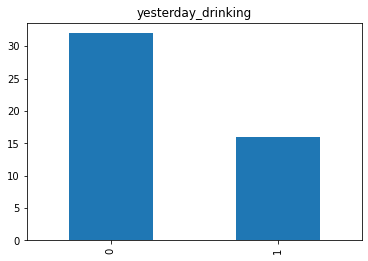

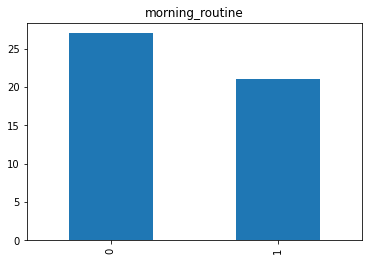

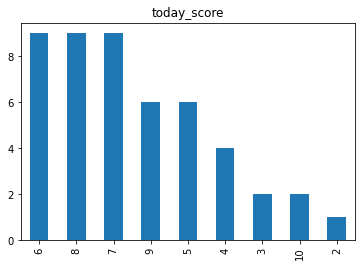

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


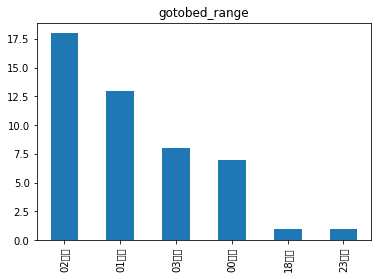

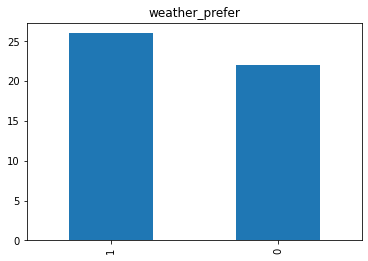

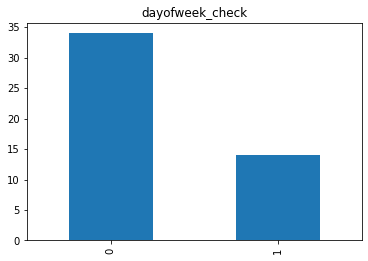

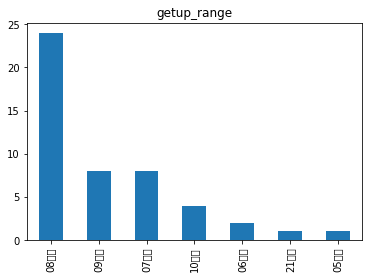

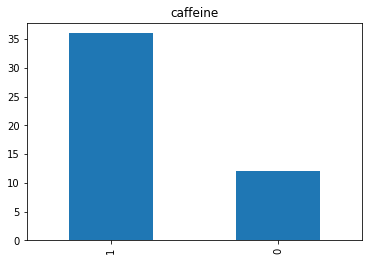

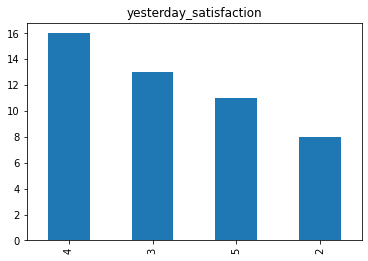

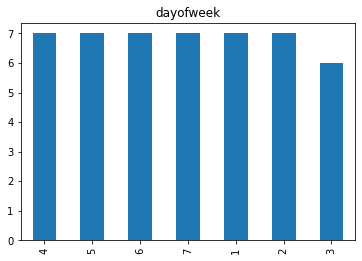

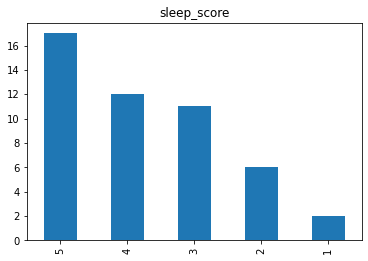

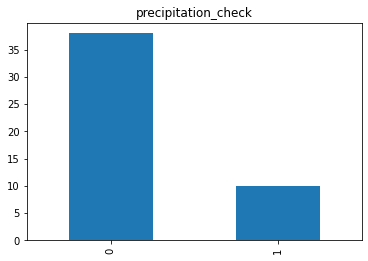

In [35]:
for col in col_eda_bar:
    squirrel[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

## 수치형 변수 distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

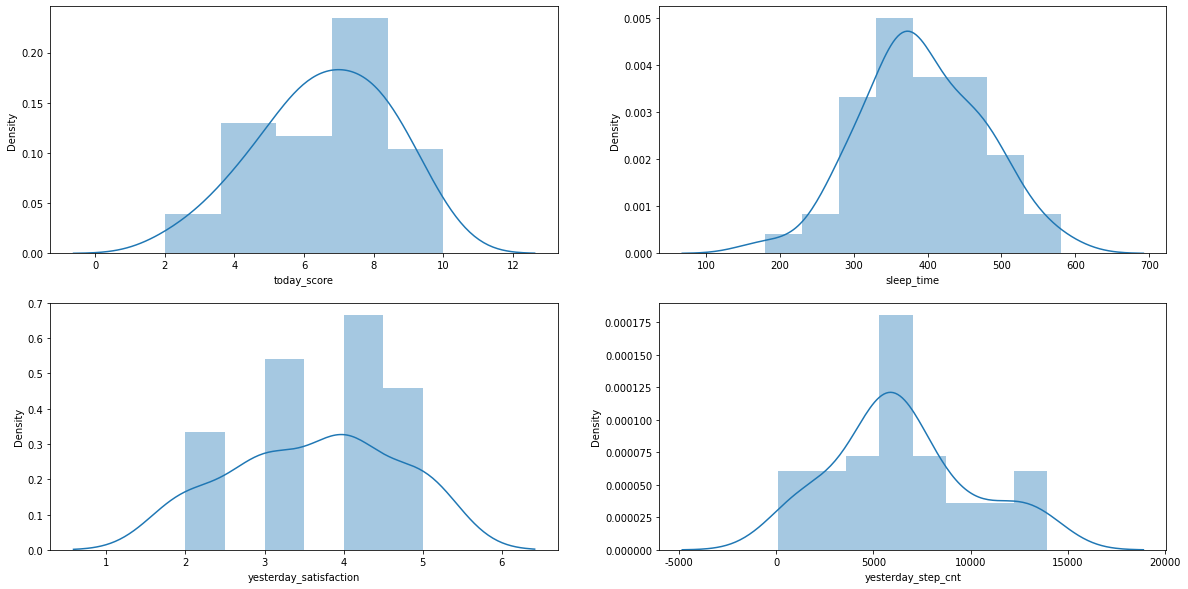

In [39]:
# 수치형 변수 distplot

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,row_n*5))

sns.distplot(squirrel['today_score'], ax=ax[0,0])
sns.distplot(squirrel['sleep_time'], ax=ax[0,1])
sns.distplot(squirrel['yesterday_satisfaction'], ax=ax[1,0])
sns.distplot(squirrel['yesterday_step_cnt'], ax=ax[1,1])

## 상관분석

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


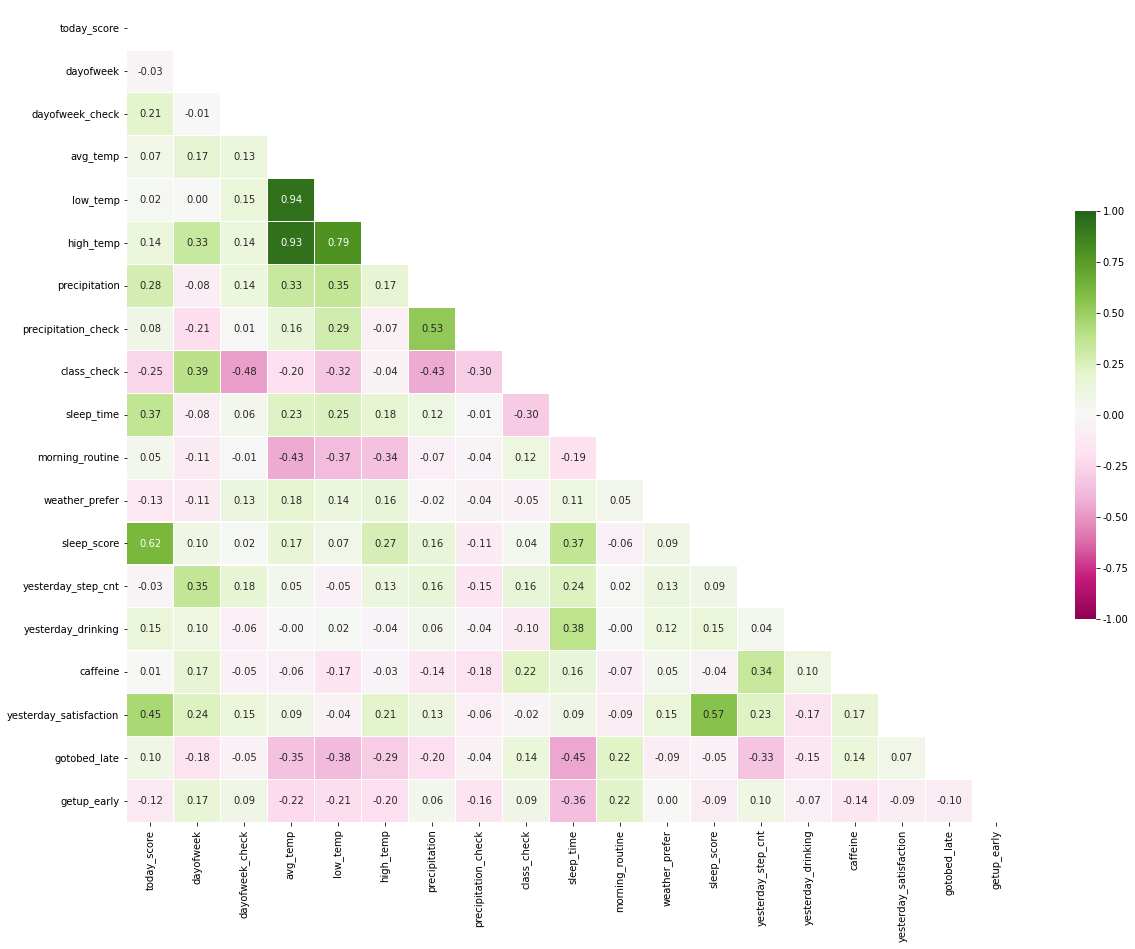

In [40]:
# 히트맵

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(squirrel.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
plt.figure(figsize=(20,15)) # 그림 사이즈 지정
heat = sns.heatmap(squirrel.corr(), 
                   annot=True, # 실제 값 표시
                   fmt = '.2f', #
                   mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
                   linewidths=0.2, # 경계면 구분
                   cbar_kws={"shrink": .5},  # 컬러바 크기 절반으로 줄이기
                   cmap='PiYG',  # 히트맵 팔레트 색상 불러오기
                   vmin = -1,vmax = 1)  # 컬러바 범위 -1 ~ 1

plt.show()

# 4. squirrel 단순 회귀

## 전날 걸음수 단순회귀

In [44]:
ols('today_score ~ yesterday_step_cnt', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.03739
Date:                Sat, 26 Nov 2022   Prob (F-statistic):              0.848
Time:                        15:50:38   Log-Likelihood:                -98.366
No. Observations:                  48   AIC:                             200.7
Df Residuals:                      46   BIC:                             204.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.7021      0.577     11.610      0.000       5.540       7.864
yesterday_step_cnt -1.515e-05   7.83e-05     -0.193      0.848      -0.000       0.000
==============================================================================
Omnibus:                        1.280   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.298
Skew:                          -0.334   Prob(JB):                        0.523
Kurtosis:                       2.550   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

yesterday_step_cnt 변수의 p-value가 0.05보다 커, 유의미하지 않다.

## 💫전날만족도 단순회귀

In [45]:
ols('today_score ~ yesterday_satisfaction', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     11.51
Date:                Sat, 26 Nov 2022   Prob (F-statistic):            0.00143
Time:                        15:50:40   Log-Likelihood:                -93.025
No. Observations:                  48   AIC:                             190.1
Df Residuals:                      46   BIC:                             193.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.5956      0.921      3.905      0.000       1.742       5.449
yesterday_satisfaction     0.8299      0.245      3.393      0.001       0.338       1.322
==============================================================================
Omnibus:                        0.397   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.525
Skew:                          -0.187   Prob(JB):                        0.769
Kurtosis:                       2.650   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

전날 만족도가 '오늘의 점수'의 약 18%를 설명하고 있다.

또한 coefficient 계수가 0.8299로 전날 만족도가 1점 높아지면, 오늘의 점수가 0.8299점 높아짐을 알 수 있다.

## 날씨 선호 여부 단순회귀

In [18]:
ols('today_score ~ weather_prefer', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7543
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.390
Time:                        03:21:00   Log-Likelihood:                -97.995
No. Observations:                  48   AIC:                             200.0
Df Residuals:                      46   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.8636      0.406     16.909      0.000       6.047       7.681
weather_prefer[T.1]    -0.4790      0.552     -0.869      0.390      -1.589       0.631
==============================================================================
Omnibus:                        1.869   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.721
Skew:                          -0.360   Prob(JB):                        0.423
Kurtosis:                       2.414   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

weather_prefer 변수의 p-value가 0.05보다 커, 유의미하지 않다.

## 수업 여부 단순회귀

In [19]:
ols('today_score ~ class_check', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.057
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0870
Time:                        03:21:01   Log-Likelihood:                -96.841
No. Observations:                  48   AIC:                             197.7
Df Residuals:                      46   BIC:                             201.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.4167      0.537     13.823      0.000       6.337       8.497
class_check[T.1]    -1.0833      0.620     -1.749      0.087      -2.330       0.164
==============================================================================
Omnibus:                        4.673   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                3.983
Skew:                          -0.703   Prob(JB):                        0.137
Kurtosis:                       3.115   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 평균기온 단순회귀

In [20]:
ols('today_score ~ avg_temp', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2412
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.626
Time:                        03:21:01   Log-Likelihood:                -98.260
No. Observations:                  48   AIC:                             200.5
Df Residuals:                      46   BIC:                             204.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0964      1.070      5.697      0.000       3.942       8.250
avg_temp       0.0365      0.074      0.491      0.626      -0.113       0.186
==============================================================================
Omnibus:                        1.350   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                1.341
Skew:                          -0.364   Prob(JB):                        0.511
Kurtosis:                       2.627   Cond. No.                         56.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

avg_temp 변수의 p-value가 0.05보다 커, 유의미하지 않다.

## 최저기온 단순회귀

In [21]:
ols('today_score ~ low_temp', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.02846
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.867
Time:                        03:21:01   Log-Likelihood:                -98.371
No. Observations:                  48   AIC:                             200.7
Df Residuals:                      46   BIC:                             204.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4889      0.737      8.799      0.000       5.004       7.973
low_temp       0.0120      0.071      0.169      0.867      -0.131       0.155
==============================================================================
Omnibus:                        1.306   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.319
Skew:                          -0.344   Prob(JB):                        0.517
Kurtosis:                       2.568   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

low_temp 변수의 p-value가 0.05보다 커, 유의미하지 않다.

## 최고기온 단순회귀

In [22]:
ols('today_score ~ high_temp', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9031
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.347
Time:                        03:21:02   Log-Likelihood:                -97.919
No. Observations:                  48   AIC:                             199.8
Df Residuals:                      46   BIC:                             203.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3415      1.357      3.937      0.000       2.611       8.072
high_temp      0.0656      0.069      0.950      0.347      -0.073       0.205
==============================================================================
Omnibus:                        1.274   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                1.280
Skew:                          -0.351   Prob(JB):                        0.527
Kurtosis:                       2.616   Cond. No.                         97.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

high_temp 변수의 p-value가 0.05보다 커, 유의미하지 않다.

## 💫수면시간 단순회귀

In [23]:
ols('today_score ~ sleep_time', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     7.096
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0106
Time:                        03:21:02   Log-Likelihood:                -94.943
No. Observations:                  48   AIC:                             193.9
Df Residuals:                      46   BIC:                             197.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2485      1.286      2.526      0.015       0.660       5.837
sleep_time     0.0086      0.003      2.664      0.011       0.002       0.015
==============================================================================
Omnibus:                        2.069   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.316
Skew:                          -0.092   Prob(JB):                        0.518
Kurtosis:                       2.210   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

수면시간이 '오늘의 점수'를 약 11% 설명하고 있다.

또한 coefficient 계수는 0.0086로 수면시간이 1분 증가하면, 오늘의 점수가 0.0086점 높아짐을 알 수 있다.

## 💫강수량 단순회귀

In [24]:
ols('today_score ~ precipitation', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     3.927
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0535
Time:                        03:21:03   Log-Likelihood:                -96.420
No. Observations:                  48   AIC:                             196.8
Df Residuals:                      46   BIC:                             200.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.4601      0.276     23.433      0.000       5.905       7.015
precipitation     0.0380      0.019      1.982      0.054      -0.001       0.077
==============================================================================
Omnibus:                        2.312   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.816
Skew:                          -0.476   Prob(JB):                        0.403
Kurtosis:                       3.005   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

강수량이 '오늘의 점수'를 약 5% 설명하고 있다.

또한 coefficient 계수는 0.0380로 강수량이 1만큼 증가하면, 오늘의 점수가 0.0380점 높아짐을 알 수 있다.

## 💫수면점수 단순회귀

In [25]:
ols('today_score ~ sleep_score', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     28.98
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           2.40e-06
Time:                        03:21:05   Log-Likelihood:                -86.659
No. Observations:                  48   AIC:                             177.3
Df Residuals:                      46   BIC:                             181.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.8961      0.722      4.011      0.000       1.443       4.350
sleep_score     0.9888      0.184      5.384      0.000       0.619       1.359
==============================================================================
Omnibus:                        1.701   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                1.646
Skew:                          -0.415   Prob(JB):                        0.439
Kurtosis:                       2.632   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

수면점수가 '오늘의 점수'를 약 37% 설명하고 있다.

또한 coefficient 계수는 0.9888로 수면점수가 1만큼 증가하면, 오늘의 점수가 0.9888점 높아짐을 알 수 있다.

## 늦은 수면 여부 단순회귀

In [26]:
ols('today_score ~ C(gotobed_late)', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4234
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.518
Time:                        03:21:06   Log-Likelihood:                -98.166
No. Observations:                  48   AIC:                             200.3
Df Residuals:                      46   BIC:                             204.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.4091      0.407     15.733      0.000       5.589       7.229
C(gotobed_late)[T.1]     0.3601      0.553      0.651      0.518      -0.754       1.474
==============================================================================
Omnibus:                        1.218   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                1.218
Skew:                          -0.285   Prob(JB):                        0.544
Kurtosis:                       2.466   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

gotobed_late 변수의 p-value가 0.05보다 커, 유의미하지 않다.

## 이른 기상 여부 단순회귀


In [183]:
ols('today_score ~ C(getup_early)', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7014
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.407
Time:                        06:20:25   Log-Likelihood:                -98.023
No. Observations:                  48   AIC:                             200.0
Df Residuals:                      46   BIC:                             203.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.7297      0.313     21.488      0.000       6.099       7.360
C(getup_early)[T.1]    -0.5479      0.654     -0.838      0.407      -1.865       0.769
==============================================================================
Omnibus:                        0.937   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.626   Jarque-Bera (JB):                1.006
Skew:                          -0.268   Prob(JB):                        0.605
Kurtosis:                       2.534   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

getup_early 변수의 p-value가 0.05보다 커, 유의미하지 않다.

# 5. squirrel 다중회귀

## 단순회귀에서 유의미한 결과를 도출한 독립변수 사용한 다중회귀

In [36]:
ols('today_score ~ yesterday_satisfaction + sleep_time + precipitation +sleep_score', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     9.024
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           2.20e-05
Time:                        03:21:16   Log-Likelihood:                -83.758
No. Observations:                  48   AIC:                             177.5
Df Residuals:                      43   BIC:                             186.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.2528      1.255      0.998      0.324      -1.278       3.783
yesterday_satisfaction     0.2942      0.256      1.148      0.257      -0.223       0.811
sleep_time                 0.0040      0.003      1.381      0.174      -0.002       0.010
precipitation              0.0231      0.015      1.494      0.143      -0.008       0.054
sleep_score                0.7053      0.235      3.001      0.004       0.231       1.179
==============================================================================
Omnibus:                        1.077   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                1.073
Skew:                          -0.232   Prob(JB):                        0.585
Kurtosis:                       2.433   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

sleep_score를 제외한 모든 독립변수의 p-value가 0.05보다 높게 나타나, 유의미하지 않은 결과가 도출되었다.

In [37]:
x = squirrel[['yesterday_satisfaction', 'precipitation','sleep_time', 'sleep_score']]
             
def feature_vif(x):
  vif = pd.DataFrame()
  vif['vif_factor'] = [variance_inflation_factor(x.values, i)
                      for i in range(x.shape[1])]
  vif['feature'] = x.columns
  return vif
vif = feature_vif(x)
print(vif)

   vif_factor                 feature
0   16.144398  yesterday_satisfaction
1    1.096938           precipitation
2   13.258167              sleep_time
3   19.074139             sleep_score


변수 yesterday_satisfaction과 sleep_time과 sleep_score에서 vif가 10보다 큰 다중공선성을 확인하였다.

## 💫전날 만족도, 수면 시간 다중회귀

In [38]:
ols('today_score ~ yesterday_satisfaction + sleep_time  ', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     9.920
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           0.000270
Time:                        03:21:18   Log-Likelihood:                -89.619
No. Observations:                  48   AIC:                             185.2
Df Residuals:                      45   BIC:                             190.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.8013      1.375      0.583      0.563      -1.967       3.570
yesterday_satisfaction     0.7735      0.231      3.343      0.002       0.307       1.239
sleep_time                 0.0077      0.003      2.619      0.012       0.002       0.014
==============================================================================
Omnibus:                        2.888   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.572
Skew:                           0.102   Prob(JB):                        0.456
Kurtosis:                       2.137   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
x = squirrel[['yesterday_satisfaction','sleep_time']]
             
def feature_vif(x):
  vif = pd.DataFrame()
  vif['vif_factor'] = [variance_inflation_factor(x.values, i)
                      for i in range(x.shape[1])]
  vif['feature'] = x.columns
  return vif
vif = feature_vif(x)
print(vif)

   vif_factor                 feature
0    9.978212  yesterday_satisfaction
1    9.978212              sleep_time


변수 yesterday_satisfaction 과 sleep_time의 vif = 9.978212  

독립변수 '전날 만족도'와 '수면시간'이 squirrel의 '오늘의 점수'를 약 27% 설명한다.

전날 만족도가 1점 높아지면 '오늘의 점수'가 0.7735점 높아지고, 수면 시간이 1분 증가하면 '오늘의 점수'는 0.0077점 높아짐을 알 수 있다.

## 전날 만족도, 수면점수 다중회귀

In [40]:
ols('today_score ~ yesterday_satisfaction + sleep_score ', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     15.00
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.02e-05
Time:                        03:21:21   Log-Likelihood:                -86.127
No. Observations:                  48   AIC:                             178.3
Df Residuals:                      45   BIC:                             183.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.4248      0.861      2.816      0.007       0.690       4.159
yesterday_satisfaction     0.2610      0.260      1.005      0.320      -0.262       0.784
sleep_score                0.8622      0.223      3.871      0.000       0.414       1.311
==============================================================================
Omnibus:                        1.166   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                1.066
Skew:                          -0.348   Prob(JB):                        0.587
Kurtosis:                       2.777   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

yesterday_satisfaction 변수의 p-value가 0.05보다 커, 유의미하지 않다.

## 전날 만족도, 수면시간, 수업 여부 다중회귀

In [42]:
ols('today_score ~ yesterday_satisfaction + sleep_time + class_check  ', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     7.148
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           0.000517
Time:                        03:21:22   Log-Likelihood:                -88.858
No. Observations:                  48   AIC:                             185.7
Df Residuals:                      44   BIC:                             193.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.7323      1.576      1.099      0.278      -1.444       4.908
class_check[T.1]          -0.6707      0.563     -1.191      0.240      -1.806       0.464
yesterday_satisfaction     0.7748      0.230      3.364      0.002       0.311       1.239
sleep_time                 0.0065      0.003      2.145      0.037       0.000       0.013
==============================================================================
Omnibus:                        2.793   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.512
Skew:                          -0.063   Prob(JB):                        0.470
Kurtosis:                       2.140   Cond. No.                     2.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

다른 독립변수들도 추가해보았지만, p-value가 0.05보다 높게 나타나 유의미하지 않음을 확인

따라서 최적의 회귀모델은 독립변수가 전날 만족도(yesterday_satisfaction), 수면시간(sleep_time)인 회귀식으로 나타났다.

# 6. p-value 0.1 기준 다중회귀

## 💫전날 만족도, 수면시간, 날씨 선호 여부

In [43]:
ols('today_score ~ yesterday_satisfaction + sleep_time + weather_prefer  ', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     8.236
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           0.000185
Time:                        03:21:24   Log-Likelihood:                -87.689
No. Observations:                  48   AIC:                             183.4
Df Residuals:                      44   BIC:                             190.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.8419      1.336      0.630      0.532      -1.850       3.534
weather_prefer[T.1]       -0.8882      0.463     -1.920      0.061      -1.821       0.044
yesterday_satisfaction     0.8372      0.227      3.685      0.001       0.379       1.295
sleep_time                 0.0082      0.003      2.871      0.006       0.002       0.014
==============================================================================
Omnibus:                        5.280   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                2.070
Skew:                           0.051   Prob(JB):                        0.355
Kurtosis:                       1.988   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

다만, 날씨 선호 여부 변수를 추가했을 때, 날씨 선호 여부 변수의 p-value가 0.061로 0.05보다는 높다. 
만약 완화된 기준으로 p-value가 1일 때까지를 '유의하다'고 본다면,


squirrel의 오늘의 점수는 '어제의 만족도', '수면시간', '날씨 선호여부'로 약 31%가 설명된다.
또한 어제의 만족도가 1점 높아질 때 '오늘의 점수'가 0.8372점 증가하며, 수면시간이 1분 증가할 때 '오늘의 점수'가 0.0082점 증가한다. 

한편, 날씨를 선호할때, 날씨를 선호하지 않을 때보다 '오늘의 점수'가 0.8882점 낮게 나타나, "오늘 날씨를 선호하면 '오늘의 점수'가 높을 것이다" 라는 예상과 다른 의외의 결과가 도출되었음을 알 수 있다. 

In [57]:
x = squirrel[['yesterday_satisfaction','sleep_time', 'weather_prefer']]
             
def feature_vif(x):
  vif = pd.DataFrame()
  vif['vif_factor'] = [variance_inflation_factor(x.values, i)
                      for i in range(x.shape[1])]
  vif['feature'] = x.columns
  return vif
vif = feature_vif(x)
print(vif)

   vif_factor                 feature
0   10.317211  yesterday_satisfaction
1   10.284388              sleep_time
2    2.256377          weather_prefer


vif 10보다 높다. 다중공선성 문제가 있다.

## 💫전날 만족도, 수면시간, 전날 걸음수

In [45]:
ols('today_score ~ yesterday_satisfaction + sleep_time + yesterday_step_cnt  ', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     7.973
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           0.000236
Time:                        03:21:28   Log-Likelihood:                -87.966
No. Observations:                  48   AIC:                             183.9
Df Residuals:                      44   BIC:                             191.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.8016      1.343      0.597      0.554      -1.905       3.509
yesterday_satisfaction     0.8633      0.232      3.726      0.001       0.396       1.330
sleep_time                 0.0088      0.003      3.008      0.004       0.003       0.015
yesterday_step_cnt        -0.0001    6.8e-05     -1.771      0.083      -0.000    1.66e-05
==============================================================================
Omnibus:                        0.105   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.310
Skew:                           0.032   Prob(JB):                        0.856
Kurtosis:                       2.611   Cond. No.                     4.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

또한 완화된 기준으로 p-value가 1일 때까지를 '유의하다'고 본다면, 전날 걸음수 변수를 추가했을 때, 전날 걸음수 변수의 p-value가 0.083로 유의미하다고 판단할 수 있다.


그렇다면 squirrel의 오늘의 점수는 '어제의 만족도', '수면시간', '전날 걸음수'로 약 30%가 설명된다.
또한 어제의 만족도가 1점 높아질 때 '오늘의 점수'가 0.8633점 증가하며, 수면시간이 1분 증가할 때 '오늘의 점수'가 0.0088점 증가한다. 

한편, 전날 걸음수가 1보 증가할때 '오늘의 점수'가 0.0001점 낮게 나타나, 전날 걸음수가 10000보 증가하면 '오늘의 점수'가 1점 낮게 나타남을 알 수 있다. 

In [46]:
x = squirrel[['yesterday_satisfaction','sleep_time', 'yesterday_step_cnt']]
             
def feature_vif(x):
  vif = pd.DataFrame()
  vif['vif_factor'] = [variance_inflation_factor(x.values, i)
                      for i in range(x.shape[1])]
  vif['feature'] = x.columns
  return vif
vif = feature_vif(x)
print(vif)

   vif_factor                 feature
0   10.679895  yesterday_satisfaction
1   11.292055              sleep_time
2    4.837074      yesterday_step_cnt


vif 10보다 높다. 다중공선성 문제가 있다.

## 💫전날 만족도, 수면시간, 늦은 수면 여부

In [47]:
ols('today_score ~ yesterday_satisfaction + sleep_time + gotobed_late  ', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     8.369
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           0.000163
Time:                        03:21:30   Log-Likelihood:                -87.551
No. Observations:                  48   AIC:                             183.1
Df Residuals:                      44   BIC:                             190.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.6819      1.526     -0.447      0.657      -3.757       2.393
gotobed_late[T.1]          1.0189      0.512      1.990      0.053      -0.013       2.051
yesterday_satisfaction     0.7158      0.226      3.167      0.003       0.260       1.171
sleep_time                 0.0106      0.003      3.316      0.002       0.004       0.017
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.881
Skew:                           0.355   Prob(JB):                        0.391
Kurtosis:                       2.339   Cond. No.                     2.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

또한 완화된 기준으로 p-value가 1일 때까지를 '유의하다'고 본다면, 늦은 수면 여부 변수를 추가했을 때, 늦은 수면 여부의 p-value가 0.053로 유의미하다고 판단할 수 있다.


그렇다면 squirrel의 오늘의 점수는 '어제의 만족도', '수면시간', '늦은 수면 여부'로 약 32%가 설명된다.
또한 어제의 만족도가 1점 높아질 때 '오늘의 점수'가 0.7158 증가하며, 수면시간이 1분 증가할 때 '오늘의 점수'가 0.0106점 증가한다. 

한편, 늦은 수면일 때, '오늘의 점수'가 1.0189점 높게 나타나, 늦게 자면 오늘의 점수가 떨어질 것이라는 가정과 반대로 나타났다. 

In [56]:
x = squirrel[['yesterday_satisfaction','sleep_time', 'gotobed_late']]
             
def feature_vif(x):
  vif = pd.DataFrame()
  vif['vif_factor'] = [variance_inflation_factor(x.values, i)
                      for i in range(x.shape[1])]
  vif['feature'] = x.columns
  return vif
vif = feature_vif(x)
print(vif)

   vif_factor                 feature
0   11.915426  yesterday_satisfaction
1   10.107900              sleep_time
2    2.115996            gotobed_late


vif 10보다 높다. 다중공선성 문제가 있다.

## 💫전날 만족도, 수면시간, 날씨 선호 여부, 전날 걸음수, 늦은 수면 여부

In [49]:
ols('today_score ~ C(yesterday_satisfaction) + sleep_time + weather_prefer + yesterday_step_cnt  ', data = squirrel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     4.692
Date:                Fri, 25 Nov 2022   Prob (F-statistic):            0.00102
Time:                        03:21:33   Log-Likelihood:                -85.839
No. Observations:                  48   AIC:                             185.7
Df Residuals:                      41   BIC:                             198.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          2.6100      1.256      2.077      0.044       0.073       5.147
C(yesterday_satisfaction)[T.3]     1.1639      0.716      1.625      0.112      -0.282       2.610
C(yesterday_satisfaction)[T.4]     1.6847      0.687      2.452      0.019       0.297       3.072
C(yesterday_satisfaction)[T.5]     2.9582      0.760      3.895      0.000       1.424       4.492
weather_prefer[T.1]               -0.8407      0.464     -1.814      0.077      -1.777       0.096
sleep_time                         0.0093      0.003      3.182      0.003       0.003       0.015
yesterday_step_cnt                -0.0001   6.82e-05     -1.735      0.090      -0.000    1.94e-05
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                0.945
Skew:                           0.079   Prob(JB):                        0.624
Kurtosis:                       2.331   Cond. No.                     4.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
x = squirrel[['yesterday_satisfaction','sleep_time', 'gotobed_late', 'yesterday_step_cnt']]
             
def feature_vif(x):
  vif = pd.DataFrame()
  vif['vif_factor'] = [variance_inflation_factor(x.values, i)
                      for i in range(x.shape[1])]
  vif['feature'] = x.columns
  return vif
vif = feature_vif(x)
print(vif)

   vif_factor                 feature
0   13.450843  yesterday_satisfaction
1   11.296460              sleep_time
2    2.267187            gotobed_late
3    5.182691      yesterday_step_cnt


vif 10보다 높다. 다중공선성 문제가 있다.

# 결론

단순회귀) 전날 만족도, 수면시간, 강수량, 수면점수가 squirrel의 오늘의 점수에 영향을 준다.

다중회귀) p-value <0.05 기준일때
전날만족도, 수면시간이 squirrel의 오늘의 점수에 영향을 준다.

다중회귀) p-value <0.1 기준일때
vif가 10보다 높아, 다중공선성 문제로 회귀 모델을 신뢰할 수 없다.

따라서 최종 모델은 '전날 만족도'와 '수면시간'이 독립변수인 회귀모델이다.



회귀식 : today_score = 0.7735 * yesterday_satisfaction + 0.0077 * sleep_time

독립변수 '전날 만족도'와 '수면시간'은 squirrel의 '오늘의 점수'를 약 27% 설명하며, 전날 만족도가 1점 높아지면 '오늘의 점수'가 0.7735점 높아지고, 수면 시간이 1분 증가하면 '오늘의 점수'는 0.0077점 높아진다.